In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

In [392]:
filterwarnings("ignore")
pd.options.display.max_columns = None

# Data Import

In [393]:
df = pd.read_csv("h1n1_vaccine_prediction.csv")
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [394]:
len(df)

26707

## Null Values

In [395]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

## Filling null values with mode

In [396]:
df['h1n1_worry'].fillna(float(df.h1n1_worry.mode()),inplace=True)

In [397]:
df['h1n1_awareness'].fillna(float(df.h1n1_awareness.mode()),inplace=True)

In [398]:
df['antiviral_medication'].fillna(float(df.antiviral_medication.mode()),inplace=True)

In [399]:
df['contact_avoidance'].fillna(float(df.contact_avoidance.mode()),inplace=True)

In [400]:
df['bought_face_mask'].fillna(float(df.bought_face_mask.mode()),inplace=True)

In [401]:
df['wash_hands_frequently'].fillna(float(df.wash_hands_frequently.mode()),inplace=True)

In [402]:
df['avoid_large_gatherings'].fillna(float(df.avoid_large_gatherings.mode()),inplace=True)

In [403]:
df['reduced_outside_home_cont'].fillna(float(df.reduced_outside_home_cont.mode()),inplace=True)

In [404]:
df['avoid_touch_face'].fillna(float(df.avoid_touch_face.mode()),inplace=True)

In [405]:
df['dr_recc_h1n1_vacc'].fillna(float(df.dr_recc_h1n1_vacc.mode()),inplace=True)

In [406]:
df['dr_recc_seasonal_vacc'].fillna(float(df.dr_recc_seasonal_vacc.mode()),inplace=True)

In [407]:
df['chronic_medic_condition'].fillna(float(df.chronic_medic_condition.mode()),inplace=True)

In [408]:
df['cont_child_undr_6_mnths'].fillna(float(df.cont_child_undr_6_mnths.mode()),inplace=True)

In [409]:
df['is_health_worker'].fillna(float(df.is_health_worker.mode()),inplace=True)

## Dropping column due to very large number of missing values

In [410]:
df = df.drop('has_health_insur', 1)

In [411]:
df.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

## Replacing missing values again

In [412]:
df['is_h1n1_vacc_effective'].fillna(float(df.is_h1n1_vacc_effective.mode()),inplace=True)

In [413]:
df['is_h1n1_risky'].fillna(float(df.is_h1n1_risky.mode()),inplace=True)

In [414]:
df['sick_from_h1n1_vacc'].fillna(float(df.sick_from_h1n1_vacc.mode()),inplace=True)

In [415]:
df['is_seas_vacc_effective'].fillna(float(df.is_seas_vacc_effective.mode()),inplace=True)

In [416]:
df['is_seas_risky'].fillna(float(df.is_seas_risky.mode()),inplace=True)

In [417]:
df['sick_from_seas_vacc'].fillna(float(df.sick_from_seas_vacc.mode()),inplace=True)

## Replacing categorical data with float

In [418]:
df["qualification"].replace({"< 12 Years": "1.0", "12 Years": "2.0", "Some College":"3.0", "College Graduate":"4.0"}, inplace=True)

In [419]:
df['qualification'].fillna(float(df.qualification.mode()),inplace=True)    

In [420]:
df["age_bracket"].replace({"18 - 34 Years": "1.0", "35 - 44 Years": "2.0", "45 - 54 Years":"3.0", "55 - 64 Years":"4.0", "65+ Years":"5.0"}, inplace=True)

In [421]:
df['age_bracket'].fillna(float(df.age_bracket.mode()),inplace=True)    

In [422]:
df["income_level"].replace({"Below Poverty": "1.0", "<= $75,000, Above Poverty": "2.0", "> $75,000":"3.0"}, inplace=True)

In [423]:
df['income_level'].fillna(float(df.income_level.mode()),inplace=True)

In [424]:
df["marital_status"].replace({"Married": "2.0", "Not Married": "1.0"}, inplace=True)

In [425]:
df['marital_status'].fillna(float(df.marital_status.mode()),inplace=True)

In [426]:
df["housing_status"].replace({"Own": "2.0", "Rent": "1.0"}, inplace=True)

In [427]:
df['housing_status'].fillna(float(df.housing_status.mode()),inplace=True)

In [428]:
df["employment"].replace({"Not in Labor Force": "1.0", "Unemployed": "2.0", "Employed" : "3.0"}, inplace=True)

In [429]:
df['employment'].fillna(float(df.employment.mode()),inplace=True)

In [430]:
df["race"].replace({"White": "1.0", "Black": "2.0", "Other or Multiple" : "3.0","Hispanic":"4.0"}, inplace=True)

In [431]:
df['race'].fillna(float(df.race.mode()),inplace=True)

In [432]:
df["sex"].replace({"Female": "1.0", "Male": "2.0"}, inplace=True)

In [433]:
df['sex'].fillna(float(df.sex.mode()),inplace=True)

In [434]:
df['no_of_adults'].fillna(float(df.no_of_adults.mode()),inplace=True)

In [435]:
df['no_of_children'].fillna(float(df.no_of_children.mode()),inplace=True)

In [436]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [437]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,3.0,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,4.0,1.0,2.0,2.0,1.0,2.0,3.0,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,"MSA, Not Principle City",1.0,0.0,0


In [438]:
df.h1n1_vaccine.isnull().sum()

0

In [439]:
df = df.drop('census_msa', 1)

# Modeling

In [440]:
X=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [441]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.70, random_state=0)

In [442]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [443]:
predictions=model.predict(X_test)

In [444]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7886065792992779

In [445]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[14210,   427],
       [ 3525,   533]], dtype=int64)

<AxesSubplot:>

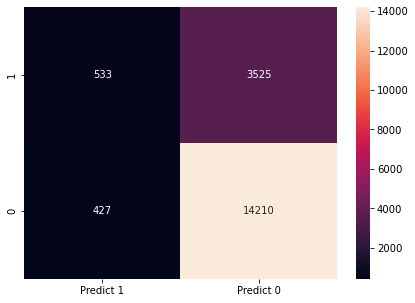

In [446]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')